In [1]:
from udntools.region import ServiceRegion
from udntools.channel import BaseChannel
from udntools.utils.plot import get_circle
#import warnings
#warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from udntools.utils import cdf_y_axis
import matplotlib


In [2]:
region = ServiceRegion(0, 100,
                       0, 100,
                       100, 50000,
                       bs_distribution="single_circle",
                       ue_distribution="gaussian",
                       ue_sigma=5.0,
                       bs_radius_1=30,
                       if_fix_bs=False)

In [3]:
#基本参数设定

loss_factor_array = np.array([4.0])
lf_shape = loss_factor_array.shape[0]

bs_number_array = np.array([8, 16])
color_array = np.array(['r', 'b'])
bs_n_shape = bs_number_array.shape[0]

bs_radius_array = np.array([25.0, 50.0])
bs_r_shape = bs_radius_array.shape[0]
marker_array = ['o', 's']

# 设定仿真的信干比区间
x_axis = np.arange(-10, 21, 1)

cdf_shape = np.shape(x_axis)[0]

curves = np.zeros((lf_shape, bs_n_shape, bs_r_shape, cdf_shape))

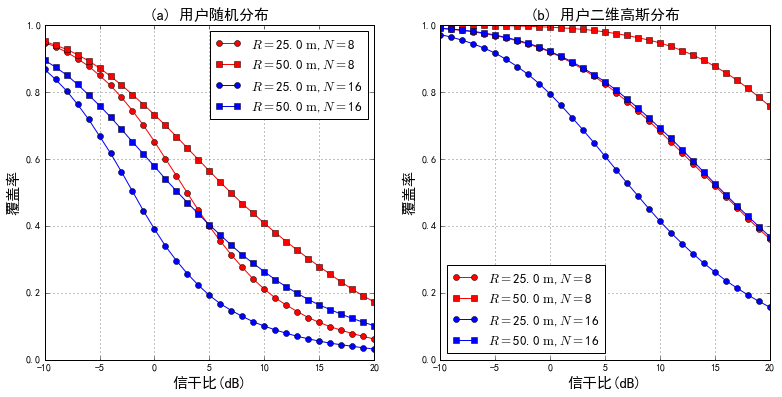

In [4]:

# 图片大小
fig = plt.figure(figsize=(13, 6))
# 使能中文字体
# -*- coding:utf-8 -*-
plt.subplot(121)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

region.set_ue_distribution('uniform')

for i, value_i in enumerate(loss_factor_array):
    channel = BaseChannel(value_i)
    for j, value_j in enumerate(bs_number_array):
        region.set_bs_number(value_j, fresh_ue=False)
        for k, value_k in enumerate(bs_radius_array):
            region.set_bs_radius_1(value_k, fresh_ue=True)
            sir_user_sim =10 * np.log10(
                 channel.sir_vector(region.bs_position_,
                                    region.ue_position_))
            curves[i, j, k, :] = \
                1 - cdf_y_axis(x_axis, sir_user_sim)
            f, = plt.plot(x_axis, curves[i, j, k, :],
                          color=color_array[j],
                          marker=marker_array[k],
                          label='$R=$%s$\ \mathrm{m}$,$N=$%s'%(value_k, value_j))
            plt.legend(loc='best',
                       prop={'size': 13})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', fontsize=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', fontsize=15)

plt.xlim(-10, 20)
plt.ylim(0,1.0)
plt.grid(True)
plt.title("(a) 用户随机分布",fontproperties = 'SimHei', size=15)
plt.subplot(122)

region.set_ue_distribution('gaussian')
region.set_ue_sigma(5.0)
for i, value_i in enumerate(loss_factor_array):
    channel = BaseChannel(value_i)
    for j, value_j in enumerate(bs_number_array):
        region.set_bs_number(value_j, fresh_ue=False)
        for k, value_k in enumerate(bs_radius_array):
            region.set_bs_radius_1(value_k, fresh_ue=True)
            sir_user_sim =10 * np.log10(
                 channel.sir_vector(region.bs_position_,
                                    region.ue_position_))
            curves[i, j, k, :] = \
                1 - cdf_y_axis(x_axis, sir_user_sim)
            f, = plt.plot(x_axis, curves[i, j, k, :],
                          color=color_array[j],
                          marker=marker_array[k],
                          label='$R=$%s$\ \mathrm{m}$,$N=$%s'%(value_k, value_j))
            plt.legend(loc='best',
                       prop={'size': 13})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=15)

plt.title("(b) 用户二维高斯分布",fontproperties = 'SimHei', size=15)
plt.xlim(-10, 20)
plt.ylim(0,1.0)
plt.grid(True)

fig.savefig('pc_single_circle_n_r.pdf')
fig.savefig('pc_single_circle_n_r.png')
                
plt.show()

In [5]:
number_array = np.arange(2, 21, 1)

radius = np.arange(1, 53, 2.0)

N, R = np.meshgrid(radius, number_array)

pc_0_db_uniform = np.zeros((np.shape(number_array)[0],
                            np.shape(radius)[0]))
pc_3_db_uniform = np.zeros((np.shape(number_array)[0],
                            np.shape(radius)[0]))
pc_5_db_uniform = np.zeros((np.shape(number_array)[0],
                            np.shape(radius)[0]))

pc_0_db_gaussian = np.zeros((np.shape(number_array)[0],
                            np.shape(radius)[0]))
pc_3_db_gaussian = np.zeros((np.shape(number_array)[0],
                            np.shape(radius)[0]))
pc_5_db_gaussian = np.zeros((np.shape(number_array)[0],
                            np.shape(radius)[0]))

channel = BaseChannel(4.0)
region.set_ue_distribution('uniform')

for i, value_i in enumerate(number_array):
    region.bs_number_ = value_i
    for j, value_j in enumerate(radius):
        region.set_bs_radius_1(value_j, fresh_ue=True)
        sir_user_sim =10 * np.log10(
             channel.sir_vector(region.bs_position_,
                                region.ue_position_))

        pc_0_db_uniform[i, j] = np.size(np.argwhere(sir_user_sim > 0)) \
                                / region.ue_number_ / 2
        
        pc_3_db_uniform[i, j] = np.size(np.argwhere(sir_user_sim > 3)) \
                                / region.ue_number_ / 2
        pc_5_db_uniform[i, j] = np.size(np.argwhere(sir_user_sim > 5)) \
                                / region.ue_number_ / 2

region.set_ue_distribution('gaussian')
region.set_ue_sigma(5.0)

for i, value_i in enumerate(number_array):
    region.bs_number_ = value_i
    for j, value_j in enumerate(radius):
        region.set_bs_radius_1(value_j, fresh_ue=True)
        sir_user_sim =10 * np.log10(
             channel.sir_vector(region.bs_position_,
                                region.ue_position_))

        pc_0_db_gaussian[i, j] = np.size(np.argwhere(sir_user_sim > 0)) \
                                / region.ue_number_ / 2
        
        pc_3_db_gaussian[i, j] = np.size(np.argwhere(sir_user_sim > 3)) \
                                / region.ue_number_ / 2
        pc_5_db_gaussian[i, j] = np.size(np.argwhere(sir_user_sim > 5)) \
                                / region.ue_number_ / 2

/home/zoo2/Documents/UDNs/program/udntools/channel/base_channel.py:77: RuntimeWarning: divide by zero encountered in true_divide
  return np.reshape(power_vector / interference_vector, (1, -1))


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


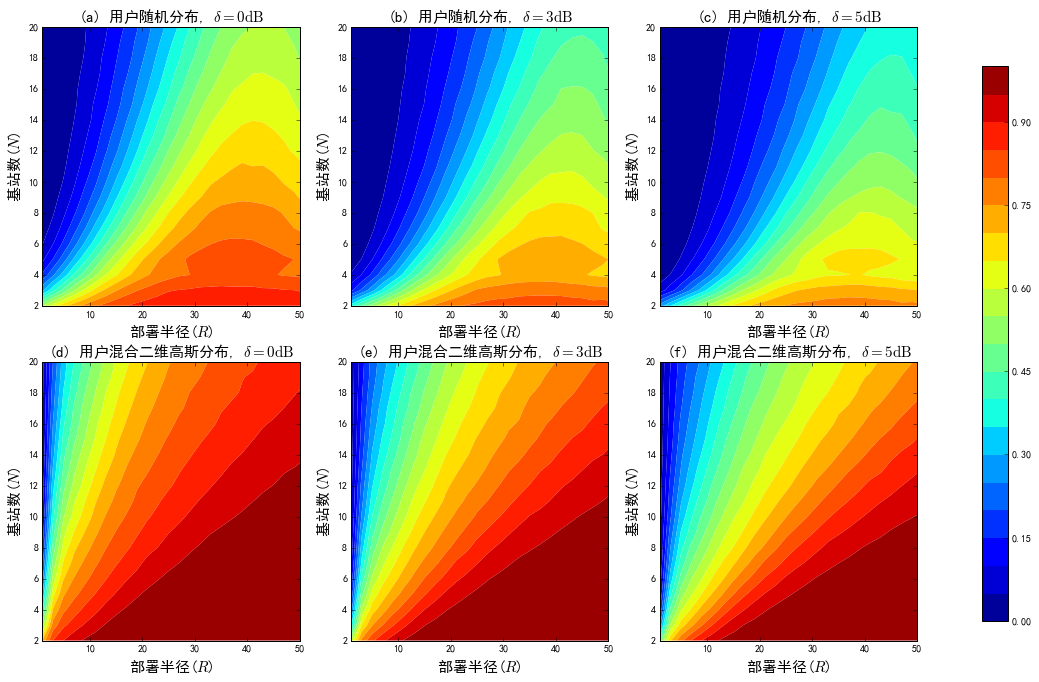

In [7]:
import matplotlib
params = {'axes.labelsize': 15,'axes.titlesize':15, 'legend.fontsize': 15}
matplotlib.rcParams.update(params)

fig = plt.figure(figsize=(18,11))  
ax = fig.add_subplot(231)
im1 = ax.contourf(N,R,pc_0_db_uniform,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(1,50)
plt.ylim(2,20)
plt.xlabel("部署半径($R$)", size=15)
plt.ylabel("基站数($N$)", size=15)
plt.title("(a) 用户随机分布, $\delta=0\mathrm{dB}$",fontproperties = 'SimHei', size=15)

ax = fig.add_subplot(232)
im1 = ax.contourf(N,R,pc_3_db_uniform,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(1,50)
plt.ylim(2,20)
plt.xlabel("部署半径($R$)", size=15)
plt.ylabel("基站数($N$)", size=15)

plt.title("(b) 用户随机分布, $\delta=3\mathrm{dB}$",fontproperties = 'SimHei', size=15)

ax = fig.add_subplot(233)
im1 = ax.contourf(N,R,pc_5_db_uniform,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(1,50)
plt.ylim(2,20)
plt.title("(c) 用户随机分布, $\delta=5\mathrm{dB}$",fontproperties = 'SimHei', size=15)
plt.xlabel("部署半径($R$)", size=15)
plt.ylabel("基站数($N$)", size=15)


ax = fig.add_subplot(234)
im1 = ax.contourf(N,R,pc_0_db_gaussian,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)

plt.xlabel("部署半径($R$)", size=15)
plt.ylabel("基站数($N$)", size=15)
plt.xlim(1,50)
plt.ylim(2,20)
plt.title("(d) 用户混合二维高斯分布, $\delta=0\mathrm{dB}$",fontproperties = 'SimHei', size=15)

ax = fig.add_subplot(235)
im1 = ax.contourf(N,R,pc_3_db_gaussian,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(1,50)
plt.ylim(2,20)
plt.title("(e) 用户混合二维高斯分布, $\delta=3\mathrm{dB}$",fontproperties = 'SimHei', size=15)
plt.xlabel("部署半径($R$)", size=15)
plt.ylabel("基站数($N$)", size=15)

ax = fig.add_subplot(236)
im1 = ax.contourf(N,R,pc_5_db_gaussian,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(1,50)
plt.ylim(2,20)
plt.xlabel("部署半径($R$)", size=15)
plt.ylabel("基站数($N$)", size=15)
plt.title("(f) 用户混合二维高斯分布, $\delta=5\mathrm{dB}$",fontproperties = 'SimHei', size=15)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im1, cax=cbar_ax)


fig.savefig('pc_single_circle_hot_map.pdf')
fig.savefig('pc_single_circle_hot_map.eps')
plt.show()

